In [21]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [24]:
#load the data

In [2]:
db = pd.read_csv(r"C:\Users\25670\Desktop\project one\AusApparalSales4thQrt2020.csv")

In [3]:
db

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


# 1. Data Wrangling

In [4]:
db.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [5]:
db.values

array([['1-Oct-2020', ' Morning', ' WA', ' Kids', 8, 20000],
       ['1-Oct-2020', ' Morning', ' WA', ' Men', 8, 20000],
       ['1-Oct-2020', ' Morning', ' WA', ' Women', 4, 10000],
       ...,
       ['30-Dec-2020', ' Evening', ' TAS', ' Men', 15, 37500],
       ['30-Dec-2020', ' Evening', ' TAS', ' Women', 11, 27500],
       ['30-Dec-2020', ' Evening', ' TAS', ' Seniors', 13, 32500]],
      dtype=object)

In [7]:
db.tail()

,Date,Time,State,Group,Unit,Sales
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500


In [34]:
 #checking for missing and incorrect values

In [32]:
missing_values = db.isnull().sum()
incorrect_values = db.isna().sum()

In [33]:
print(incorrect_values)

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [11]:
print(missing_values)

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


The data doesnt contain any null or incorrect values.

In [31]:
#normalising the data

In [39]:
#the units and columns are numerical whilst the rest in the other columns are categorical thus

In [41]:
numerical_columns = ["Unit","Sales"]
sales = MinMaxScaler()
db[numerical_columns] = scaler.fit_transform(db[numerical_columns])

In [42]:
print(db.head())

         Date        Time State     Group      Unit     Sales
0  1-Oct-2020     Morning    WA      Kids  0.095238  0.095238
1  1-Oct-2020     Morning    WA       Men  0.095238  0.095238
2  1-Oct-2020     Morning    WA     Women  0.031746  0.031746
3  1-Oct-2020     Morning    WA   Seniors  0.206349  0.206349
4  1-Oct-2020   Afternoon    WA      Kids  0.015873  0.015873


In [43]:
print(db.tail())

             Date        Time State     Group      Unit     Sales
7555  30-Dec-2020   Afternoon   TAS   Seniors  0.190476  0.190476
7556  30-Dec-2020     Evening   TAS      Kids  0.206349  0.206349
7557  30-Dec-2020     Evening   TAS       Men  0.206349  0.206349
7558  30-Dec-2020     Evening   TAS     Women  0.142857  0.142857
7559  30-Dec-2020     Evening   TAS   Seniors  0.174603  0.174603


In [ ]:
# Recommendation on the usage of the groupby() function
# We can use the groupby() function for data chunking or merging to perform operations on the grouped data


# 2. Data Analysis

In [51]:
# Performing descriptive statistical analysis on the 'Sales' and 'Unit' columns

In [49]:
descriptive_stats = db[['Sales', 'Unit']].describe()

In [50]:
print(descriptive_stats)

             Sales         Unit
count  7560.000000  7560.000000
mean      0.254054     0.254054
std       0.204784     0.204784
min       0.000000     0.000000
25%       0.095238     0.095238
50%       0.190476     0.190476
75%       0.380952     0.380952
max       1.000000     1.000000


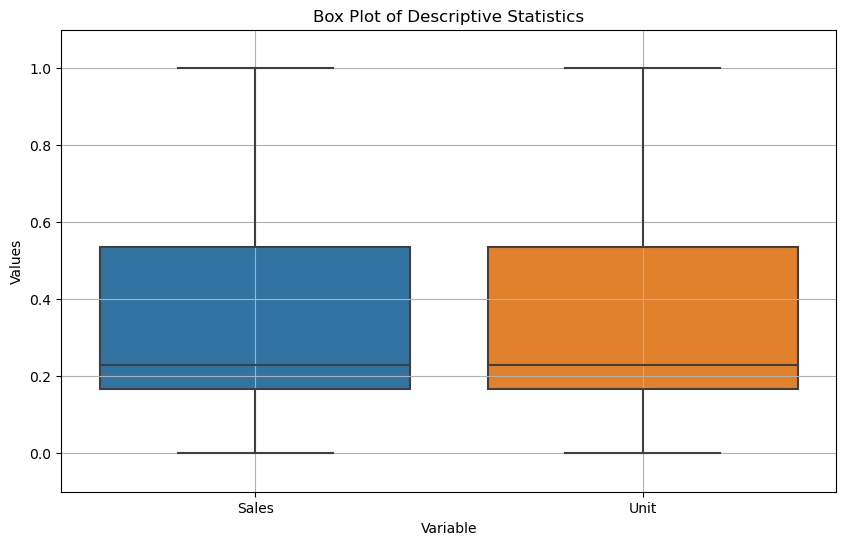

In [88]:
# Create a DataFrame with the provided descriptive statistics
data = {
    'Statistic': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'Sales': [7560.000000, 0.254054, 0.204784, 0.000000, 0.095238, 0.190476, 0.380952, 1.000000],
    'Unit': [7560.000000, 0.254054, 0.204784, 0.000000, 0.095238, 0.190476, 0.380952, 1.000000]
}

stats_df = pd.DataFrame(data)

# Melt the DataFrame to have a single column for value and one for variable
melted_df = pd.melt(stats_df, id_vars=['Statistic'], var_name='Variable', value_name='Value')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='Variable', y='Value', whis=1.5)  # Adjust whisker length
plt.title('Box Plot of Descriptive Statistics')
plt.ylabel('Values')
plt.xlabel('Variable')
plt.ylim(-0.1, 1.1)  # Adjust y-axis limits
plt.grid(True)  # Add grid for better readability
plt.show()


In [52]:
# Determining which group is generating the highest and lowest sales
group_sales = db.groupby('Group')['Sales'].sum()
highest_group_sales = group_sales.idxmax()
lowest_group_sales = group_sales.idxmin()

In [53]:
print(highest_group_sales)

 Men


In [54]:
print(lowest_group_sales)

 Seniors


In [56]:
# Determining which state is generating the highest and lowest sales
state_sales = db.groupby('State')['Sales'].sum()
highest_state_sales = state_sales.idxmax()
lowest_state_sales = state_sales.idxmin()

In [57]:
print(highest_state_sales)

 VIC


In [58]:
print(lowest_state_sales)

 WA


In [ ]:
# Generate weekly, monthly, and quarterly reports for the analysis made

In [72]:
# Load the data with 'Date' column set as index
db = pd.read_csv(r"C:\Users\25670\Desktop\project one\AusApparalSales4thQrt2020.csv", index_col='Date', parse_dates=True)

# Weekly report
weekly_report = db.resample('W').sum(numeric_only=True)

# Monthly report
monthly_report = db.resample('M').sum(numeric_only=True)

# Quarterly report
quarterly_report = db.resample('Q').sum(numeric_only=True)

# Print the reports
print("Weekly Report:")
print(weekly_report.head())

print("\nMonthly Report:")
print(monthly_report.head())

print("\nQuarterly Report:")
print(quarterly_report.head())


Weekly Report:
             Unit     Sales
Date                       
2020-10-04   6018  15045000
2020-10-11  10801  27002500
2020-10-18  10656  26640000
2020-10-25  10726  26815000
2020-11-01   8723  21807500

Monthly Report:
             Unit      Sales
Date                        
2020-10-31  45716  114290000
2020-11-30  36273   90682500
2020-12-31  54132  135330000

Quarterly Report:
              Unit      Sales
Date                         
2020-12-31  136121  340302500


# 3. Data Visualisation

Text(0, 0.5, 'Sales')

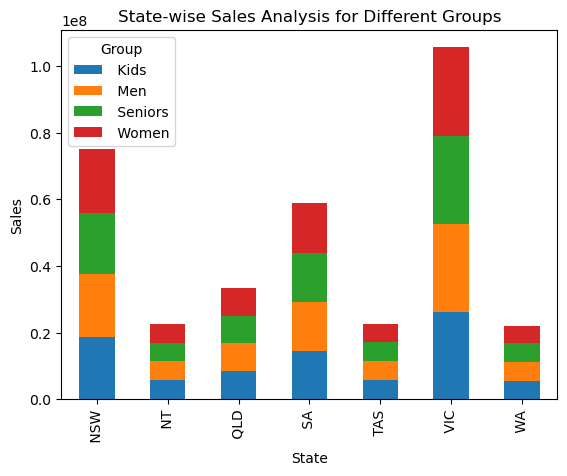

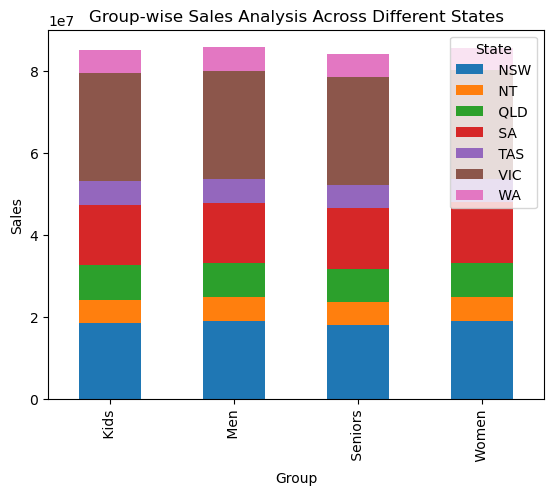

In [77]:
# dashboard for the Head of S&M using appropriate data visualization libraries
# State-wise sales analysis for different groups
state_group_sales = db.groupby(['State', 'Group'])['Sales'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('State-wise Sales Analysis for Different Groups')
plt.xlabel('State')
plt.ylabel('Sales')

# Group-wise sales analysis across different states
group_state_sales = db.groupby(['Group', 'State'])['Sales'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('Group-wise Sales Analysis Across Different States')
plt.xlabel('Group')
plt.ylabel('Sales')

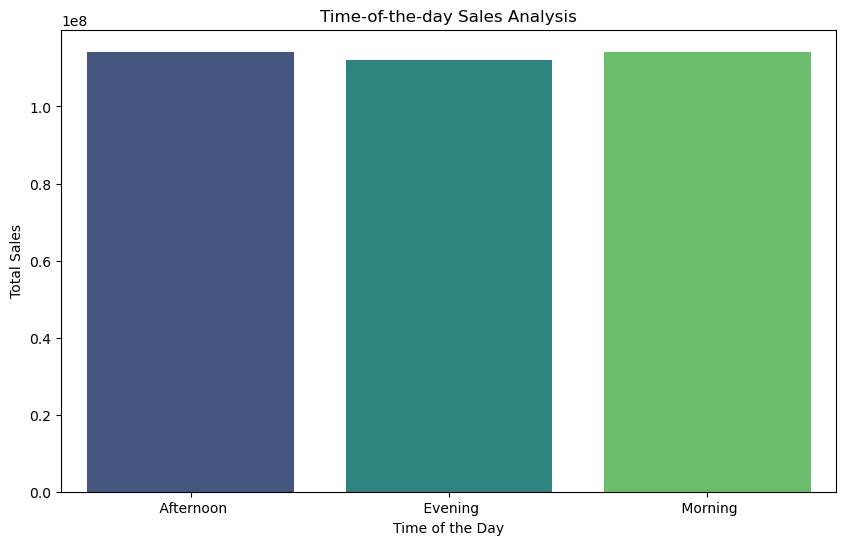

In [81]:
#time of the day analysis
# Aggregate sales based on time categories
time_sales = db.groupby('Time')['Sales'].sum()

# Plot the time-of-the-day analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=time_sales.index, y=time_sales.values, palette='viridis')
plt.title('Time-of-the-day Sales Analysis')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()


In [89]:
time_sales

Time
 Afternoon    114007500
 Evening      112087500
 Morning      114207500
Name: Sales, dtype: int64

According to the above graph, sales are lowest during the Evening and highest in the Morning

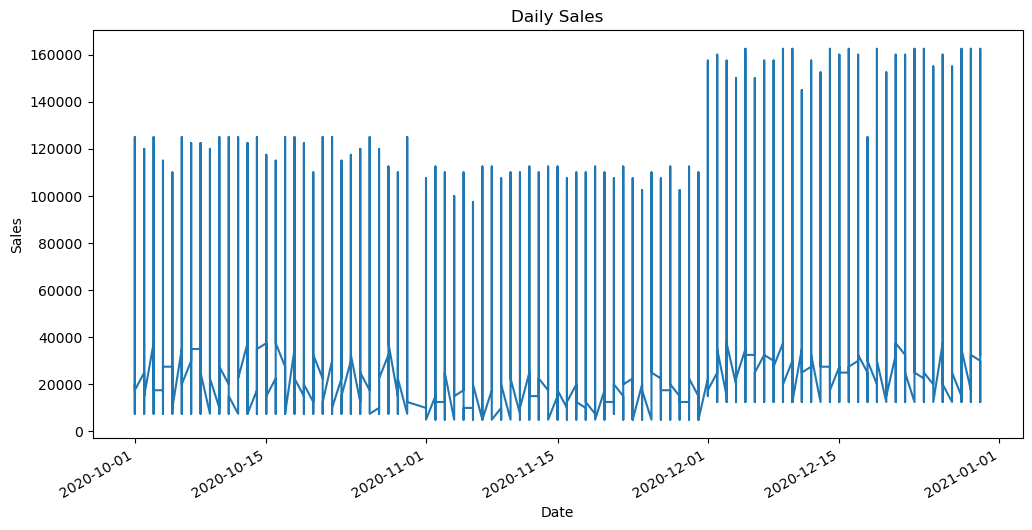

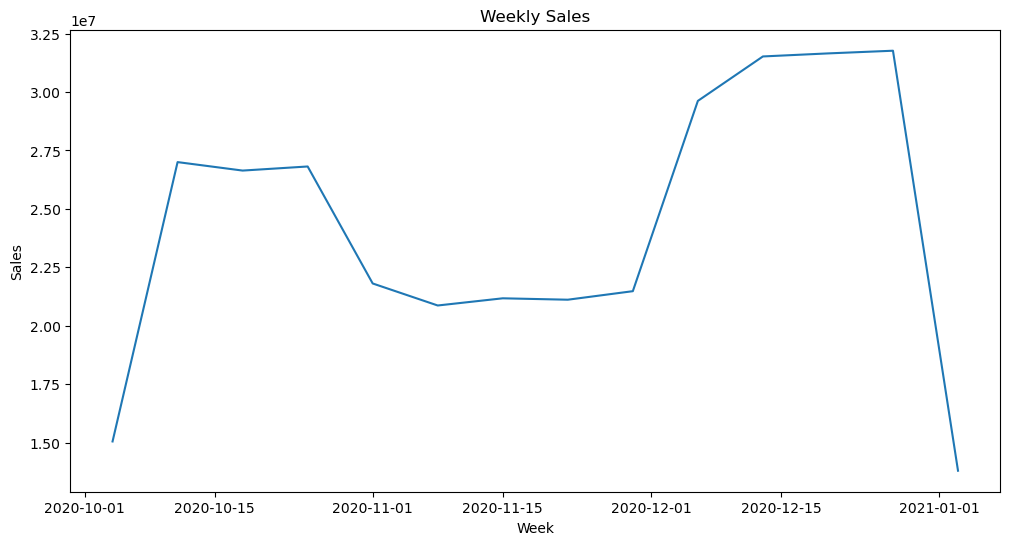

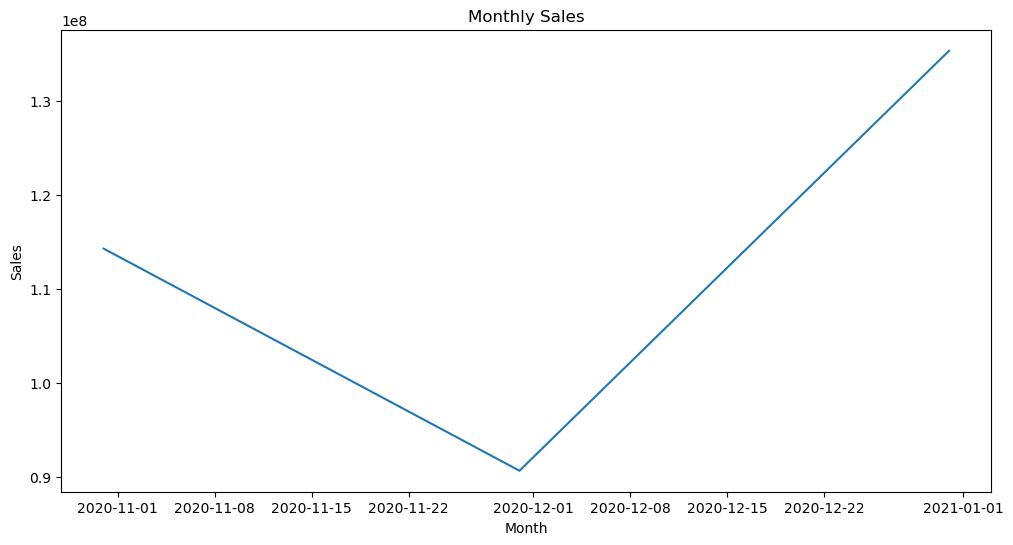

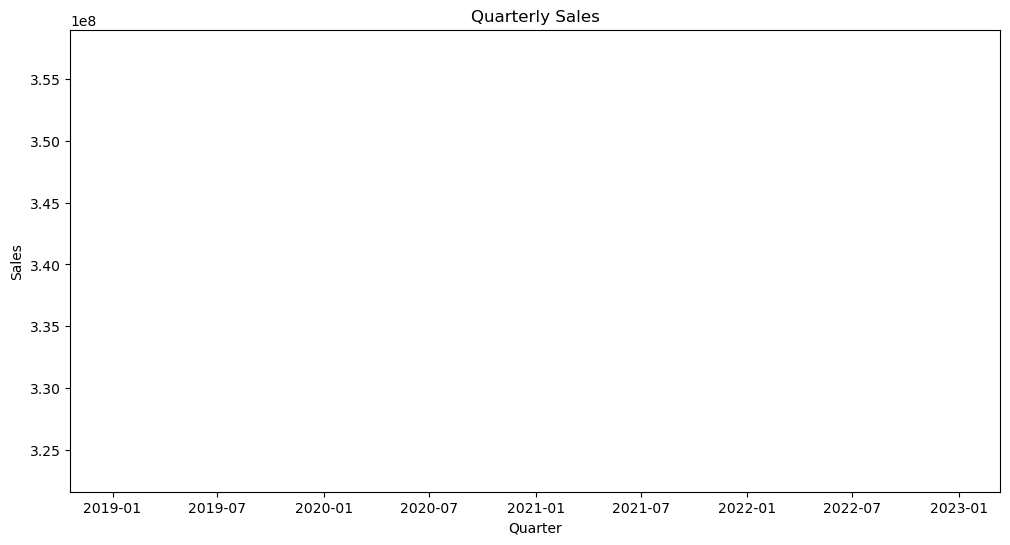

In [84]:
# Daily chart
plt.figure(figsize=(12, 6))
db['Sales'].plot()
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Weekly chart
plt.figure(figsize=(12, 6))
weekly_report = db.resample('W').sum(numeric_only=True)
sns.lineplot(data=weekly_report, x=weekly_report.index, y='Sales')
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()

# Monthly chart
plt.figure(figsize=(12, 6))
monthly_report = db.resample('M').sum(numeric_only=True)
sns.lineplot(data=monthly_report, x=monthly_report.index, y='Sales')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Quarterly chart
plt.figure(figsize=(12, 6))
quarterly_report = db.resample('Q').sum(numeric_only=True)
sns.lineplot(data=quarterly_report, x=quarterly_report.index, y='Sales')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()


# Recommendations

Based on the analysis conducted, here are some recommendations for formulating sales programs for states with lower revenues:

1. **Identify Underperforming States**: Utilize the insights gained from the analysis to identify the specific states with lower revenues compared to others. Focus on understanding the underlying factors contributing to the lower sales in these states.

2. **Customer Segmentation**: Segment the customer base within the underperforming states based on demographics, purchasing behavior, and preferences. Tailor sales programs to meet the specific needs of each segment, such as offering personalized promotions or product recommendations.

3. **Targeted Marketing Campaigns**: Develop targeted marketing campaigns to increase brand awareness and drive customer engagement in the underperforming states. Utilize various channels such as social media, email marketing, and local advertising to reach potential customers effectively.

4. **Incentivize Sales Teams**: Provide incentives and bonuses to sales teams operating in the underperforming states to motivate them to achieve higher sales targets. Implement performance-based rewards to encourage sales representatives to actively pursue new leads and opportunities.

5. **Expand Product Offerings**: Assess the demand for additional product categories or variations within the underperforming states. Expand the product offerings to cater to the unique preferences and needs of customers in these regions, thereby increasing sales opportunities.

6. **Improve Distribution Channels**: Evaluate the efficiency of distribution channels in the underperforming states and identify any bottlenecks or inefficiencies. Streamline distribution processes and explore partnerships with local retailers or distributors to enhance market reach and accessibility.

7. **Enhance Customer Experience**: Focus on enhancing the overall customer experience to drive repeat purchases and foster customer loyalty. Invest in training programs for sales and customer service teams to ensure high-quality interactions and prompt resolution of customer inquiries or issues.

8. **Monitor and Adjust Strategies**: Continuously monitor the effectiveness of sales programs implemented in the underperforming states and track key performance indicators (KPIs) such as sales revenue, customer acquisition, and retention rates. Analyze the data regularly and adjust strategies as needed to optimize results.

By implementing these recommendations, AAL can formulate targeted sales programs to address the challenges faced in states with lower revenues, ultimately driving growth and improving overall business performance.